In [1]:
import os
from pyprojroot import here
project_root = here()
print(f"Changing working directory to {project_root}")
os.chdir(project_root)


Changing working directory to /home/ptr/workspace/technikum/technikum-big-data


# Subtitle segmentation



In [2]:
from bigchina.analyzer import *

tiger = segment_subtitle_file("data/subtitles/Tiger.Dragon.srt")
tiger

,segment,characteristic,is_punctuation,sentence,sentence_word_id
0,喲,noun,False,0,0
1,!,punctuation mark,True,1,0
2,,None,False,1,1
3,李,noun,False,1,2
4,爺,noun,False,1,3
...,...,...,...,...,...
10986,,None,False,1832,1
10987,一起,locative word,False,1832,2
10988,回,verb,False,1832,3
10989,新疆,noun,False,1832,4


In [3]:
tiger.characteristic.value_counts()

noun                    3504
punctuation mark        1833
verb                    1439
pronoun                  889
adverb                   568
particle                 416
adjective                295
modal particle           228
preposition              221
classifier               139
numeral                  135
conjunction               68
noun of locality          65
distinguishing word       53
time word                 42
interjection              14
locative word             12
multiword expression       4
prefix                     2
suffix                     2
Name: characteristic, dtype: int64

<AxesSubplot:xlabel='characteristic'>

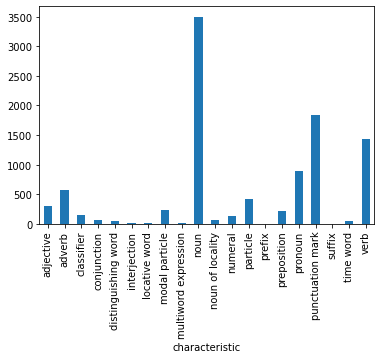

In [4]:
tiger.groupby("characteristic")["segment"].count().plot.bar()

In [5]:
df = tiger[tiger.characteristic != "punctuation mark"]
df = df.groupby("segment").count().reset_index()[["segment", "characteristic"]]

df = df.rename(columns = {"segment": "word", "characteristic": "count"})

df.sort_values("count", ascending=False).head(20)

,word,count
634,我,331
129,你,295
960,的,290
751,是,211
79,了,199
44,不,169
1267,這,145
135,來,108
514,就,96
768,有,90
